In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [5]:
# loading the datasets
iris=load_iris()
x=iris.data
y=iris.target

In [29]:
# scaling the feature
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [12]:
# performing hierarchical clustering
link_matrix=linkage(x_scaled,method='ward')

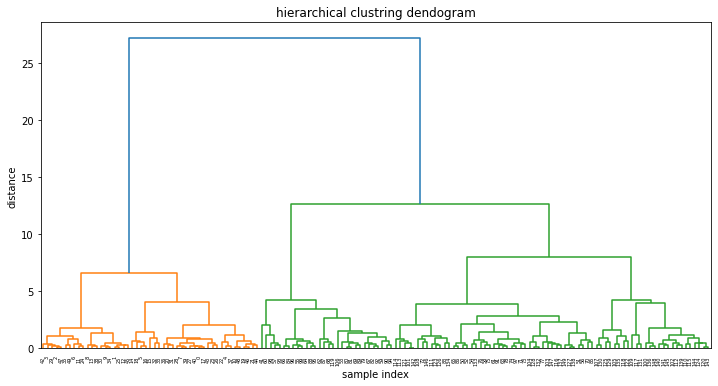

In [19]:
# ploting dendogram
plt.figure(figsize=(12,6))
dendrogram(link_matrix)
plt.title('hierarchical clustring dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [38]:
# Applying Agglomerative clustering
num_clusters=3 # we classifie into 3 groups as iris dataset has 3 groups
agg_cluster=AgglomerativeClustering(n_clusters=num_clusters,linkage='ward')
labels=agg_cluster.fit_predict(x_scaled)

In [39]:
# Visualize the clustered data
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

Text(0, 0.5, 'Feature 2 (Standardized)')

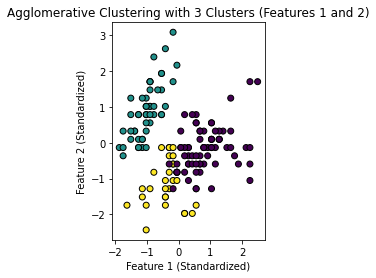

In [45]:
# Plot the first two features with color-coded clusters
plt.subplot(1, 2, 1)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.title(f'Agglomerative Clustering with {num_clusters} Clusters (Features 1 and 2)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')


Text(0, 0.5, 'Feature 3 (Standardized)')

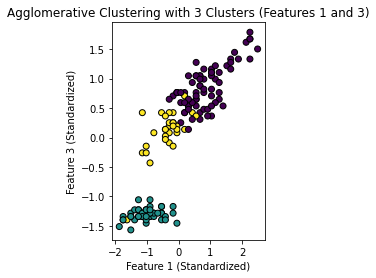

In [44]:
# Plot the first and third features with color-coded clusters
plt.subplot(1, 2, 2)
plt.scatter(x_scaled[:, 0], x_scaled[:, 2], c=labels, cmap='viridis', edgecolors='k')
plt.title(f'Agglomerative Clustering with {num_clusters} Clusters (Features 1 and 3)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 3 (Standardized)')

In [54]:
# claculating silhouette_coefficients for verifiing
silhouette_coefficients=[]
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(x_scaled)
    score = silhouette_score(x_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

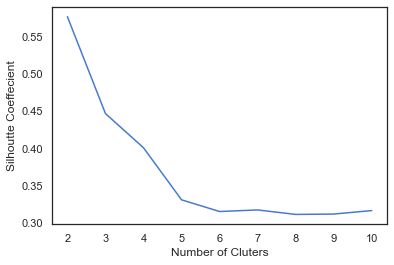

In [55]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()